In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# !pip install -U protobuf==3.11.3

In [10]:
# keras.models.load_model("model_5.pkl")

# keras.models.load_model("savetest1.h5")

In [11]:
# for l in open("model_5.npy"):
#     print(l)

In [23]:
liar = pd.read_csv("liar_dataset/train.tsv", sep='\t' , names=["file","fake","content","tags","speaker","job","state", "political_leaning","n1","n2","n3","n4","n5", "where"])
fake = pd.read_csv("train_data.csv")

In [24]:
liar = liar["content"]
fake = fake["content"]

In [82]:
fakecounts = np.array([l.count(" ") for l in fake])
liarcounts = np.array([l.count(" ") for l in liar])
liarcounts = liarcounts[liarcounts<80]

In [105]:
print("Fake mean",
np.mean(fakecounts))
print("Fake median",
np.median(fakecounts))
print("liar mean",
np.mean(liarcounts))
print("liar median",
np.median(liarcounts))

Fake mean 513.5616212379874
Fake median 329.0
liar mean 16.912572042590604
liar median 16.0


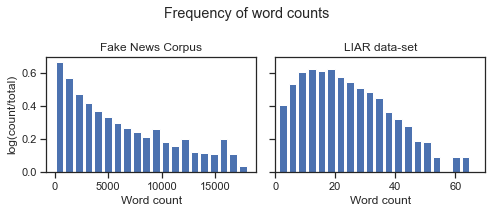

In [101]:
import seaborn as sns
sns.set(style = "ticks")

fig, axs = plt.subplots(1,2, sharey= True, figsize = (7,3))

hist, bins = np.histogram(fakecounts, bins = 20)

axs[0].bar((bins[1:] + bins[:-1])/2, np.log(hist)/np.log(sum(fakecounts)), align = "center",  width= (bins[1]-bins[0])*0.8)

hist, bins = np.histogram(liarcounts, bins = 20)
axs[1].bar((bins[1:] + bins[:-1])/2, np.log(hist)/np.log(sum(liarcounts)), align = "center",  width= (bins[1]-bins[0])*0.8)
axs[1].set_xlim(0,70)
axs[0].set_ylabel("log(count/total)")

axs[0].set_title("Fake News Corpus")
axs[1].set_title("LIAR data-set")
fig.suptitle("Frequency of word counts")
axs[0].set_xlabel("Word count")
plt.xlabel("Word count")
fig.tight_layout()
plt.show()

In [133]:
np.std([0.9330, 0.9370, 0.9290])

0.0032659863237109073

In [130]:
np.mean(np.round(np.random.random(1000000)) == np.random.choice([0,1], 1000000, p = [0.45,0.55],))

0.499791